In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [16]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

def graph(data_name):
    data = pd.read_csv(data_name, sep = " ")
    plt.figure()
    plt.grid(True)
    data_srez = data[(data["lambda"] > 770) & (data["lambda"] < 800)]
    x = data_srez["lambda"].values
    y = data_srez["I"].values

    # initial guess: amplitude, mean at max, sigma ~ range/10
    p0 = [y.max(), x[np.argmax(y)], (x.max() - x.min()) / 10]

    try:
        popt, pcov = sp.optimize.curve_fit(gaussian, x, y, p0=p0)
    except Exception as e:
        print("Fit failed:", e)
        return

    # smooth curve for plotting the fit
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = gaussian(x_fit, *popt)

    # plot data and fitted gaussian
    plt.plot(x, y, 'b.', label='data')
    plt.plot(x_fit, y_fit, 'r-', label='gaussian fit')
    plt.legend()
    plt.title(f'Fit: A={popt[0]:.3g}, mu={popt[1]:.3g}, sigma={popt[2]:.3g}')

    # print fitted parameters and covariance
    print("Fitted parameters:")
    print(f"A = {popt[0]}")
    print(f"mu = {popt[1]}")
    print(f"sigma = {popt[2]}")
    print(f"Ширина линии = {2.355 * popt[2]}")

    plt.show()
    







Fitted parameters:
A = 24309.19215052965
mu = 786.8188968723166
sigma = -0.27882169298380194
Ширина линии = -0.6566250869768535


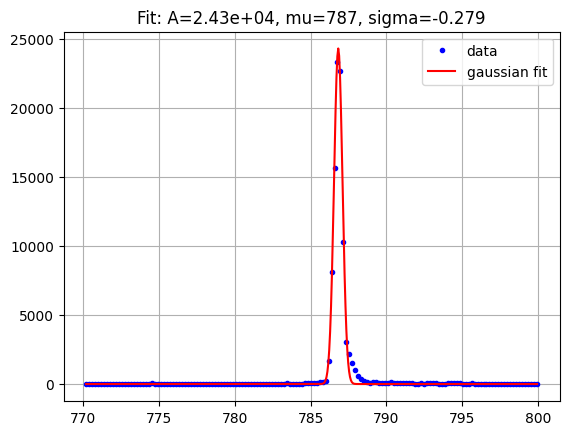

Fitted parameters:
A = 9360.917602414696
mu = 786.8852298061587
sigma = -0.21949676665895643
Ширина линии = -0.5169148854818424


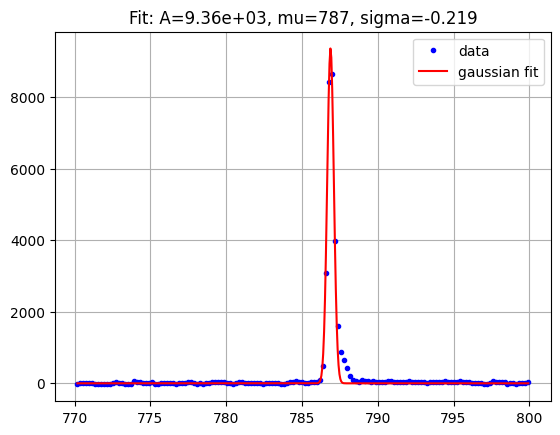

In [17]:
graph("laser_spectre_1.csv")
graph("laser_spectre_2.csv")